In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import numpy as np
import sys
import os
sys.path.append("../")
from search_world.utils.analysis_utils import get_trials_dataframe, get_dataset_paths, get_trials_features, get_consistency, get_condition_df, get_condition_features
from search_world.utils.moog_utils import get_trial_paths, get_trial_dataframe
from search_world.utils.plot_utils import plot_maze
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
import pandas as pd
from matplotlib import cm
%matplotlib inline

In [256]:
base_dir = '../logs'
all_job_ids = [f for f in os.scandir(base_dir) if f.is_dir() and f.path != os.path.join(base_dir,'slurm_logs')]
agent_df = get_trials_dataframe(get_dataset_paths(job_ids=all_job_ids, base_dir=''), overwrite=True)

In [82]:
human_base_dir = '../human_logs'
dataset_paths = [f.path for f in os.scandir(human_base_dir)]

dataset_trial_paths = []
for i, path in enumerate(dataset_paths): 
    trial_paths = get_trial_paths(path)
    dataset_trial_paths.append(trial_paths)
    
dataset_index = 0
trial_df = []
for trial_paths in dataset_trial_paths:
    dataset_index += 1
    new_df =  get_trial_dataframe(trial_paths, dataset_index=dataset_index)
    trial_df.append(new_df)

trial_df = pd.concat(trial_df)

print('Total number of trials: %d' % len(trial_df))

Number of trials:  42
Number of trials:  18
Number of trials:  20
Number of trials:  7
Number of trials:  3
Number of trials:  4
Number of trials:  19
Number of trials:  93
Number of trials:  164
Number of trials:  5
Number of trials:  2
Number of trials:  201
Number of trials:  66
Number of trials:  3
Number of trials:  2
Number of trials:  53
Number of trials:  61
Number of trials:  24
Number of trials:  1
Number of trials:  5
Number of trials:  56
Number of trials:  4
Number of trials:  6
Number of trials:  2
Number of trials:  2
Number of trials:  3
Number of trials:  7
Number of trials:  6
Number of trials:  66
Total number of trials: 945


In [257]:
df = pd.concat((agent_df, trial_df))
df = get_trials_features(df) 
human_df = df[df['name'] == 'Human']
condition_df = get_condition_features(get_condition_df(df, condition=['length', 'n_corr', 'agent_init_state', 'target_state']), df)
consistency_df = get_consistency(condition_df, df, condition=['length', 'n_corr', 'agent_init_state', 'target_state'])

/home/apiccato/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


## Plotting trajectories on high-error conditions for humans

In [258]:
%matplotlib inline
qmdp_df = df[df['name'] == 'QMDPAgent']
qmdp_condition_df = condition_df.loc[condition_df.index.get_level_values('name') == 'QMDPAgent'].dropna()
human_condition_df = condition_df.loc[condition_df.index.get_level_values('name') == 'Human'].dropna()
# human_condition_df = human_condition_df.reset_index().set_index(condition)
human_condition_df = human_condition_df[human_condition_df.n_trials >= 3]
human_condition_df = human_condition_df.sort_values('error', ascending=False)

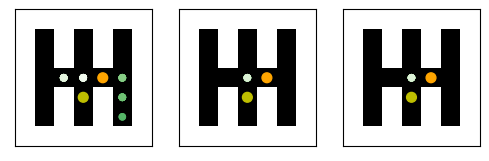

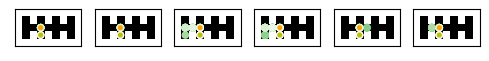

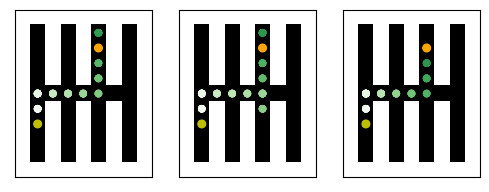

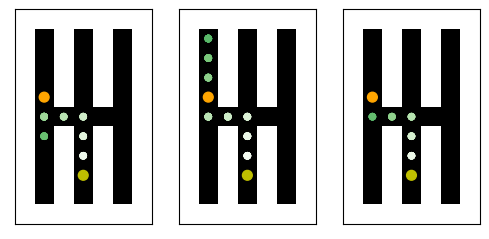

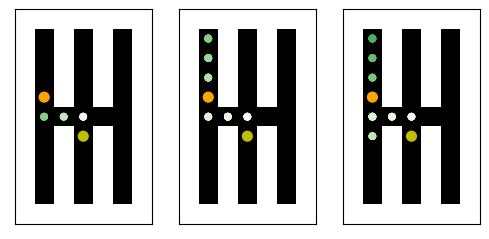

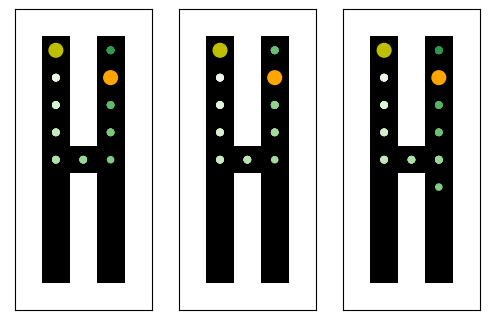

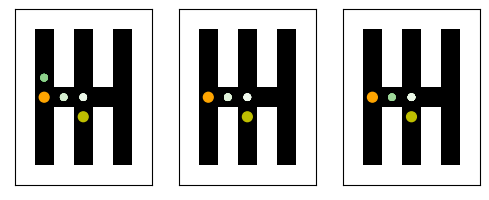

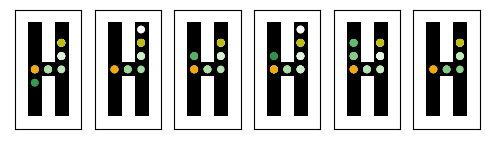

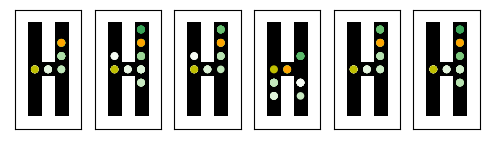

In [259]:
for i in range(1, 10):
    hcd_i = df.set_index(human_condition_df.index.names).sort_index().loc[human_condition_df.index[i]]
    f, axs = plt.subplots(1, len(hcd_i), dpi=100)
#     if type(axs) is not list:
#         axs = [axs]
    for idx, (_, trial) in enumerate(hcd_i.iterrows()):
        plot_maze(trial, axs[idx])
    plt.show()

In [260]:
print(df.set_index(condition).iloc[0].action)
# sprint(df.set_index(condition).iloc[0].target_state)
# print(df.set_index(condition).iloc[0].agent_init_state)
print(df.set_index(condition).iloc[0].name)

[3, 3, 3, 3, 0]
(9, 4, 3, 21)


In [261]:
condition_df.loc[(9, 3, 0, 9)]

,agent_dist,agent_dist_hist,error,n_trials
name,,,,
Human,"[3, 3]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2
MLSAgent,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,66
OptimalAgent,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,33
QMDPAgent,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,66


In [262]:
index = (9, 3, 0, 9)
# print(human_df.set_index(condition).loc[index])
human_condition_df = condition_df.loc[condition_df.index.get_level_values('name') == 'Human'].dropna()
print(qmdp_condition_df.loc[index].agent_dist_hist.iloc[0])
print(human_condition_df.loc[index].agent_dist_hist.iloc[0])

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



## Plotting trajectories on high-error conditions for QMDP

AttributeError: 'Maze' object has no attribute '_state_space'

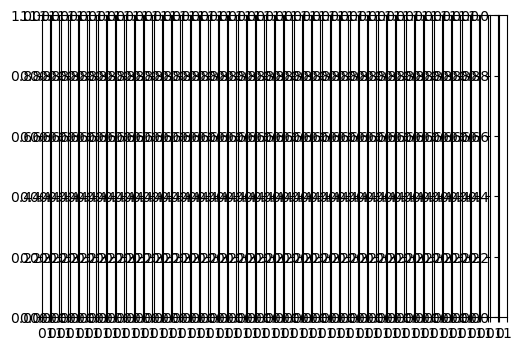

In [125]:
%matplotlib inline

qmdp_condition_df = condition_df.loc[condition_df.index.get_level_values('name') == 'QMDPAgent'].dropna()
# human_condition_df = human_condition_df.reset_index().set_index(condition)
qmdp_condition_df = qmdp_condition_df[qmdp_condition_df.n_trials >= 3]
qmdp_condition_df = qmdp_condition_df.sort_values('error', ascending=False)
for i in range(10):
    hcd_i = df.set_index(qmdp_condition_df.index.names).sort_index().loc[qmdp_condition_df.index[i]]
    f, axs = plt.subplots(1, len(hcd_i), dpi=100)
    for idx, (_, trial) in enumerate(hcd_i.iterrows()):
        plot_maze(trial, axs[idx])
    plt.show()

## Plotting trajectories on high-error conditions for MLS